In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality', ylabel='chlorides'>

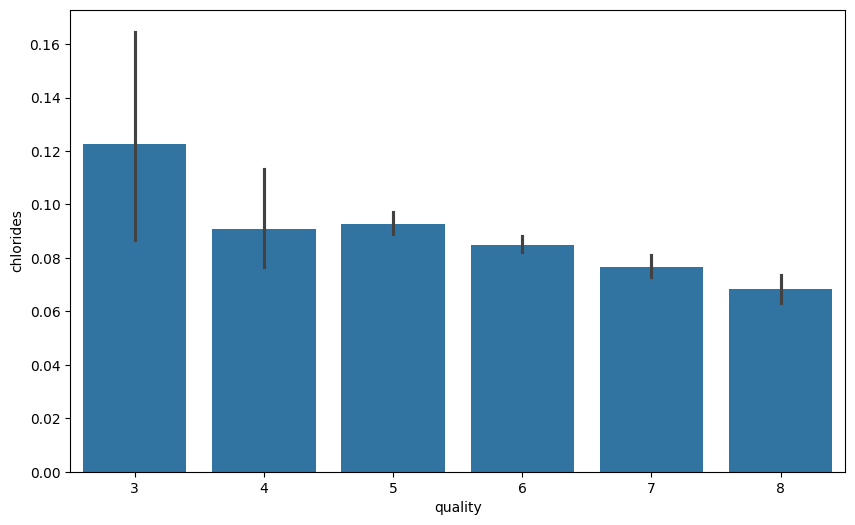

In [3]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x= 'quality', y= 'chlorides', data= df)

In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality']= pd.cut(df['quality'], bins=bins, labels= group_names)

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [6]:
lq = LabelEncoder()
df['quality'] = lq.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [7]:
x = df.drop('quality', axis=1)
y = df['quality']


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [11]:
print("Accuracy Score =", accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy Score = 0.903125
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.75      0.51      0.61        47

    accuracy                           0.90       320
   macro avg       0.84      0.74      0.78       320
weighted avg       0.90      0.90      0.90       320



In [12]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [13]:
print("Accuracy Score =", accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuracy Score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
}
grid = GridSearchCV(svc, param, cv=10, verbose=2)

In [16]:
grid.fit(x_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [17]:
pred = grid.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy Score: 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320

